In [196]:
#importing the dataset

%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_titanic=pd.read_csv("Titanic_dataset.csv")
df_titanic_test = pd.read_csv("Titanic_test_dataset.csv")

display(df_titanic.head(5))
display(df_titanic_test.head(5))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
df_titanic.shape, df_titanic_test.shape

((891, 12), (418, 11))

# Exploring Data

In [165]:
#lets check datatype of columns
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [166]:
total = df_titanic.isnull().sum().sort_values(ascending = False)
percent_1 = df_titanic.isnull().sum()/df_titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [167]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
df_titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

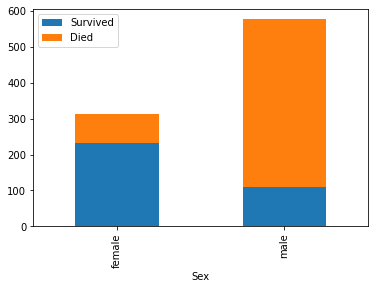

In [169]:
#Number of survived passangers Vs non survied passangers comparision
#data = train_raw
df_titanic['Died']= 1 - df_titanic['Survived']

df_titanic.groupby("Sex").agg("sum")[["Survived", "Died"]].plot(kind="bar", stacked = True)

#with the below chart we can confirm number of survived passangers from female are significantly high compared to male 

From the above graph it is evident that male passengers are died.

Let's correlate the age with the survival variable

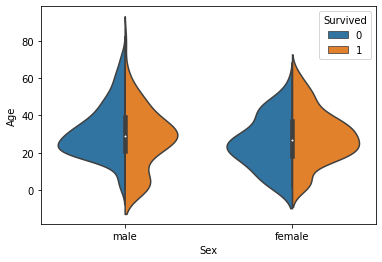

In [170]:
sns.violinplot(x="Sex", y = "Age", hue = "Survived", data = df_titanic, split = True)

As we can see in the chart above, Women survive more than men, as decpicted bhy larger female green histogram.

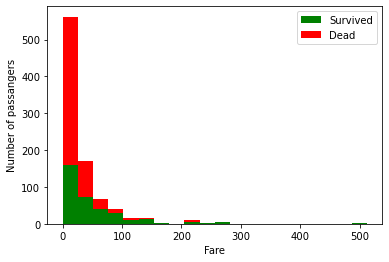

In [171]:
#ploting the ticket fare of passangers and its impact on survived/died
plt.hist([df_titanic[df_titanic["Survived"] ==1]["Fare"], df_titanic[df_titanic["Survived"]==0]["Fare"]],
         stacked = 2, color = ["g","r"], bins = 20, label = ["Survived", "Dead"])
plt.xlabel('Fare')
plt.ylabel('Number of passangers')
plt.legend();


Above graph says passengers with cheaper ticket fares are more likely to die.

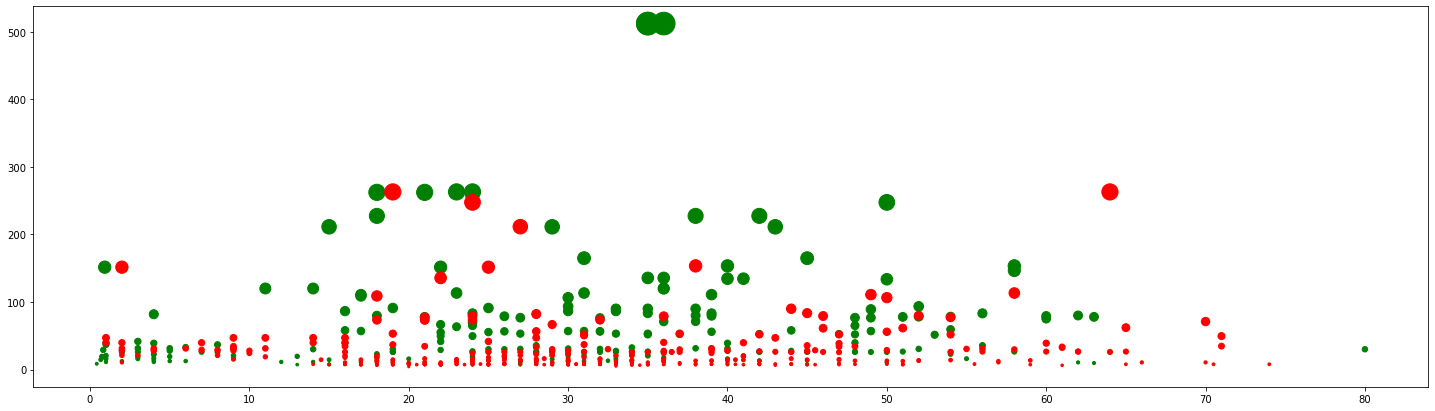

In [172]:
#combining age, fare and survival in one chart.

plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(df_titanic[df_titanic['Survived'] == 1]['Age'], df_titanic[df_titanic['Survived'] == 1]['Fare'], 
           c='green', s=df_titanic[df_titanic['Survived'] == 1]['Fare'])
ax.scatter(df_titanic[df_titanic['Survived'] == 0]['Age'], df_titanic[df_titanic['Survived'] == 0]['Fare'], 
           c='red', s=df_titanic[df_titanic['Survived'] == 0]['Fare']);

Size of the circles is proportional to the ticket fare. X-axis = AGE Y-axis = Ticket_Fare Green = Survived Red = Died

Small green dots between x=0 & x=7 : Children who were saved Small red dots between x=10 & x=45 : adults who died and from a lower classes Large green dots between x=20 & x=45 : Adults with larger ticket fares who are sruvived

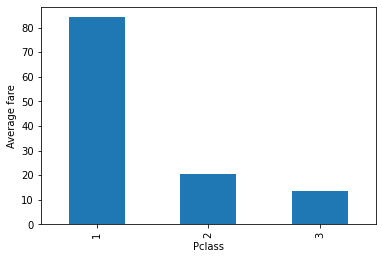

In [173]:
#ticket fare versues class
ax = plt.subplot()
ax.set_ylabel('Average fare')
df_titanic.groupby('Pclass').mean()['Fare'].plot(kind='bar',ax=ax);

# Feature Engineering

In [198]:
#Combining the test and train data to prepare the data for modeling.

x_train = df_titanic.drop(['Survived'],1)
y_train = df_titanic['Survived']
x_test = df_titanic_test

In [201]:
df_combined = x_train.append(x_test)
df_combined.shape

(1309, 11)

In [199]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [202]:
display_all(df_combined.tail().T)

,413,414,415,416,417
PassengerId,1305,1306,1307,1308,1309
Pclass,3,1,3,3,3
Name,"Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,male,male,male
Age,NaN,39,38.5,NaN,NaN
SibSp,0,0,0,0,1
Parch,0,0,0,0,1
Ticket,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,C105,NaN,NaN,NaN


In [204]:
#Check the missing data %
display_all(df_combined.isnull().sum().sort_index()/len(df_combined))

Age            0.200917
Cabin          0.774637
Embarked       0.001528
Fare           0.000764
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Ticket         0.000000
dtype: float64

In [218]:
#proc_df takes a data frame df and splits off the response variable, and
#changes the df into an entirely numeric dataframe. In this case am excluding the 
# fields in ignore_flds as they need further processing.

df = df_combined[['Age','Name','Embarked','Cabin','Parch','SibSp','PassengerId','Pclass','Sex','Ticket','Fare']]
#df,nas = proc_df[df_combined[ignore_flds=['Age','Name','Embarked','Cabin','Parch','SibSp']]]
df.head()

,Age,Name,Embarked,Cabin,Parch,SibSp,PassengerId,Pclass,Sex,Ticket,Fare
0,22.0,"Braund, Mr. Owen Harris",S,NaN,0,1,1,3,male,A/5 21171,7.2500
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,C85,0,1,2,1,female,PC 17599,71.2833
2,26.0,"Heikkinen, Miss. Laina",S,NaN,0,0,3,3,female,STON/O2. 3101282,7.9250
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,C123,0,1,4,1,female,113803,53.1000
4,35.0,"Allen, Mr. William Henry",S,NaN,0,0,5,3,male,373450,8.0500


# Process Family

In [219]:
def process_family():
    
    global df
    # introducing a new feature : the size of families (including the passenger)
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
    
    # introducing other features based on the family size
    df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)    
    return df

In [221]:
df = process_family()

<ipython-input-219-7fbe9eef40ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
<ipython-input-219-7fbe9eef40ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
<ipython-input-219-7fbe9eef40ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [176]:
"""def process_family():
    global df_titanic
    #introducing new feature, size of families (including the passanger)
    df_titanic["FamilySize"] = df_titanic["Parch"] + df_titanic["SibSp"] + 1
    
    #introducing other features based on the family size
    df_titanic['Singleton'] = df_titanic['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    df_titanic['SmallFamily'] = df_titanic['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    df_titanic['LargeFamily'] = df_titanic['FamilySize'].map(lambda s: 1 if 5 <= s else 0)    
    return df_titanic
    

In [177]:
process_family()
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Died             int64
FamilySize       int64
Singleton        int64
SmallFamily      int64
LargeFamily      int64
dtype: object

# Process Embarked

In [178]:
def process_embarked():
    global df_titanic
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    df_titanic.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    df_titanic_dummies = pd.get_dummies(df_titanic['Embarked'], prefix='Embarked')
    df_titanic = pd.concat([df_titanic, df_titanic_dummies], axis=1)
    df_titanic.drop('Embarked', axis=1, inplace=True)
    return df_titanic

In [179]:
process_embarked()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Died,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,2,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,2,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,2,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1,1,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1,4,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0


# Process Cabin

In [180]:
# replacing missing cabins with U (for Uknown)
df_titanic.Cabin.fillna('U', inplace=True)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Died,FamilySize,Singleton,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,1,2,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,2,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,2,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,1,1,1,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,1,1,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,1,4,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0


In [181]:
def process_cabin():
    global df_titanic    
          
    # mapping each Cabin value with the cabin letter
    df_titanic['Cabin'] = df_titanic['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(df_titanic['Cabin'], prefix='Cabin')    
    df_titanic = pd.concat([df_titanic, cabin_dummies], axis=1)

    df_titanic.drop('Cabin', axis=1, inplace=True)
    return df_titanic

In [182]:
process_cabin()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1,0,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,1,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,1,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,1,0,0,0,0,0,0


# Get Title from Name

In [183]:
#Dealing with Age,
#As we have seen earlier Age variable has 177 missing values, which is a huge number out of 891.
#Just by replacing with the mean/median age might not be the best solution, since the age may differ by group and categories of passengers.
#Title also can contribute in computing the age.
#First I took median age grouped by Sex, PassengerClass and Title.

title = set()
for name in df_titanic["Name"]:
    title.add(name.split(',')[1].split('.')[0].strip())

title_dict = {
    "capt":"officer",
    "col":"officer",
    "Major":"officer",
    "Johnkheer": "Royalty",
    "Don" : "Royalty",
    "Sir": "Royalty",
    "Dr": "officer",
    "Rev": "officer",
    "the countees" : "Royalty",
    "Mme" : "Mrs",
    "Mlle" : "Miss",
    "Ms" : "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_title():
    #we extract titles from each name
    df_titanic["title"] = df_titanic["Name"].map(lambda name:name.split(',')[1].split(".")[0].strip())
    
    #Now maping each title
    df_titanic["title"] = df_titanic.title.map(title_dict)
    return df_titanic
df_titanic.head()

df_titanic = get_title()
df_titanic.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr


# Process Age

In [184]:
#summarize the age grouped by sex, class and title
group_titanic = df_titanic.groupby(["Sex","Pclass","title"])
group_titanic_median = group_titanic.median()
group_titanic_median = group_titanic_median.reset_index()[["Sex", "Pclass","title","Age"]]
group_titanic_median.head()

,Sex,Pclass,title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Royalty,48.0
3,female,1,officer,49.0
4,female,2,Miss,24.0


In [185]:
#Assigning the values of age for missing records,
#if the title is missing in any case then age will be assigned based on sex and class

def fill_age(row):
    condition = (
        (group_titanic_median["Sex"] == row["Sex"]) &
        (group_titanic_median["title"] == row["title"]) &
        (group_titanic_median["Pclass"] == row["Pclass"])
    )
    if np.isnan(group_titanic_median[condition]["Age"].values[0]):
        print(True)
        condition = (
            (group_titanic_median["Sex"] == row["Sex"])&
            (group_titanic_median["Pclass"] == row["Pclass"])
        )
    return group_titanic_median[condition]["Age"].values[0]

def process_age():
    global df
    #a function to fill missing values of variable
    df_titanic["Age"] = df_titanic.apply(lambda row: fill_age(row) if np.isnan(row["Age"]) else row["Age"], axis=1)
    return df_titanic


In [186]:
process_age() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,0,0,Mr


In [187]:
df_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,...,0,0,0,0,0,0,0,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,0,0,1,0,0,0,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,0,0,0,0,0,0,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,0,0,0,0,0,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,0,0,0,0,0,0,1,Mrs


In [188]:
#Check for missing values.
display_all(df_titanic.isnull().sum().sort_index()/len(df_titanic))

Age            0.000000
Cabin_A        0.000000
Cabin_B        0.000000
Cabin_C        0.000000
Cabin_D        0.000000
Cabin_E        0.000000
Cabin_F        0.000000
Cabin_G        0.000000
Cabin_T        0.000000
Cabin_U        0.000000
Died           0.000000
Embarked_C     0.000000
Embarked_Q     0.000000
Embarked_S     0.000000
FamilySize     0.000000
Fare           0.000000
LargeFamily    0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Singleton      0.000000
SmallFamily    0.000000
Survived       0.000000
Ticket         0.000000
title          0.005612
dtype: float64

In [189]:
df_titanic[df_titanic.title.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,title
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.50,...,1,0,0,0,0,0,0,0,0,NaN
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.55,...,0,0,0,0,0,0,0,0,1,NaN
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,...,0,1,0,0,0,0,0,0,0,NaN
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,...,0,1,0,0,0,0,0,0,0,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.00,...,0,0,0,0,0,0,0,0,1,NaN


In [190]:
# we clean the Name variable
df_titanic.drop('Name', axis =1, inplace=True)

# Process Name

In [191]:
def process_names():
    global df_titanic
       
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(df_titanic['title'], prefix='title')
    df_titanic = pd.concat([df_titanic, titles_dummies], axis=1)
    
    # removing the title variable
    df_titanic.drop('title', axis=1, inplace=True)
    
    return df_titanic

In [192]:
df_titanic = process_names()

In [193]:
display_all(df_titanic.isnull().sum().sort_index()/len(df_titanic))

Age              0.0
Cabin_A          0.0
Cabin_B          0.0
Cabin_C          0.0
Cabin_D          0.0
Cabin_E          0.0
Cabin_F          0.0
Cabin_G          0.0
Cabin_T          0.0
Cabin_U          0.0
Died             0.0
Embarked_C       0.0
Embarked_Q       0.0
Embarked_S       0.0
FamilySize       0.0
Fare             0.0
LargeFamily      0.0
Parch            0.0
PassengerId      0.0
Pclass           0.0
Sex              0.0
SibSp            0.0
Singleton        0.0
SmallFamily      0.0
Survived         0.0
Ticket           0.0
title_Master     0.0
title_Miss       0.0
title_Mr         0.0
title_Mrs        0.0
title_Royalty    0.0
title_officer    0.0
dtype: float64

# Build and trian the Model

In [195]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Died,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,title_Master,title_Miss,title_Mr,title_Mrs,title_Royalty,title_officer
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,1,...,0,0,0,1,0,0,1,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,...,0,0,0,1,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,1,...,0,0,0,1,0,0,0,0,0,1
887,888,1,1,female,19.0,0,0,112053,30.0000,0,...,0,0,0,0,0,1,0,0,0,0
888,889,0,3,female,18.0,1,2,W./C. 6607,23.4500,1,...,0,0,0,1,0,1,0,0,0,0
889,890,1,1,male,26.0,0,0,111369,30.0000,0,...,0,0,0,0,0,0,1,0,0,0
